# HW 2 Part 1

In [1]:
# import the necessary packages
import io
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline



__1.1__ Following the example from the [Data/1. APIs/Download data from ECB’s SDW](../../00-Data/01-ECB.ipynb) notebook, fetch the table from [ECB SDW link](https://sdw.ecb.europa.eu/datastructure.do?conceptMnemonic=ICP_ITEM&datasetinstanceid=122#cl) into a dataframe called hicp_codes. Set the index of the dataframe to the "Codes" column.

In [2]:
#import the HICP Code List Description table from the ECB’s SDW site here into a pandas dataframe.
url = 'https://sdw.ecb.europa.eu/datastructure.do?conceptMnemonic=ICP_ITEM&datasetinstanceid=122#cl'

In [3]:
r  = requests.get(url, headers={"Accept": "text/csv"})    
hicp_codes = pd.read_html(r.text)[1]
hicp_codes.set_index('Code')

,Code Description
Code,
000000,HICP - Overall index
010000,HICP - FOOD AND NON-ALCOHOLIC BEVERAGES
011000,HICP - Food
011100,HICP - Bread and cereals
011110,HICP - Rice
...,...
XESEAS,HICP - All-items excluding energy and seasonal...
XFROOP,HICP - All-items excluding frequent out-of-poc...
XFUELL,HICP - All-items excl. liquid fuels and fuels ...


__1.2__ extract from `hicp_codes` a list of the codes of the same level 3 subindices assigned to you in HW1

__Hint:__ a list comprehension may be useful here

</div> <div class="alert alert-block alert-danger"><b>

`hicp_codes.set_index('Code')` above didnt change the `hicp_codes` dataframe (add a last line with `hicp_codes` and you'll see), by default it has `inplace=False`, you need to add `inlpace=True`  After that `'Code'` is no longer in the columns, and you will need to replace `hicp_codes.loc[:,'Code']` with `hicp_codes.index`
    
</b>

In [4]:
codes = [c for c in hicp_codes.loc[:,'Code'] if c.startswith('09') & c.endswith('00') if not c.startswith('090') | c.endswith('000')]

In [5]:
codes

['091100',
 '091200',
 '091300',
 '091400',
 '091500',
 '092100',
 '092200',
 '092300',
 '093100',
 '093200',
 '093300',
 '093400',
 '093500',
 '094100',
 '094200',
 '095100',
 '095200',
 '095300',
 '095400']

__1.3__ Following the example from the [Data/1. APIs/Download data from ECB’s SDW](../../00-Data/01-ECB.ipynb) notebook, download the first series from your `codes` list into a dataframe. Rename the columns to `date` and the string in code[0]. Set `date` to be a datetime index and remove `date` from the dataframe columns.

In [6]:
code = codes[0]
code

'091100'

In [7]:
# Importing the data
SDW_URL = "https://sdw-wsrest.ecb.europa.eu/service/data"
series_code = f'ICP/M.U2.N.091100.4.ANR'
ecburl = f"{SDW_URL}/{series_code}"
response = requests.get(ecburl, headers={"Accept": "text/csv"})

assert response.status_code == 200, 'Failed to get a correct reponse'

first_series_data = pd.read_csv(io.StringIO(response.text))
df = first_series_data[["TIME_PERIOD", "OBS_VALUE"]].copy()

#Renaming the columns
df.columns.values[0]="date" 
df.columns.values[1]="091100" 

#Setting date to be a datetime index
new_index = pd.to_datetime(df.date) 
df.index=new_index

#Removing the 'old' column date
df.drop('date', axis=1, inplace=True)

df

,091100
date,
1997-01-01,-3.6
1997-02-01,-3.6
1997-03-01,-3.6
1997-04-01,-3.7
1997-05-01,-3.9
...,...
2021-09-01,0.3
2021-10-01,0.8
2021-11-01,1.7


__1.4__  Download the rest of the series from the list of `codes` into a single dataframe with index - the dates and column names given by the respective codes

__Hint:__ this will (probably) require a loop. It may be a good idea to first try with only one additional series (e.g. code[1]) and see how to make sure that the merging works. And only then run the full loop. Following this approach, is often easier to discover errors in the code and fix them (i.e. to __debug__)

</div> <div class="alert alert-block alert-danger"><b>

codes[0] has already been downloaded. You can just add it to the list with 

```
list_of_dfs = [df]
```
    
and then write the for loop as
    
```
for c in codes[1:]:
```
to ommit codes[0]
    
This two lines    
```    
        dataf.columns.values[0]='date'
        dataf.columns.values[1]=str(c) 
```    
can be simplified with   
```
dataf.columns = ['date', c]
```
Note that `c` is already a str, so no need to use `str()`

In [8]:
## TODO

list_of_dfs = []

for c in codes:
    try: 
        SDW_URL = "https://sdw-wsrest.ecb.europa.eu/service/data"
        series_code = f'ICP/M.U2.N.{c}.4.ANR'
        ecburl = f"{SDW_URL}/{series_code}"
        response = requests.get(ecburl, headers={"Accept": "text/csv"})
        assert response.status_code == 200, 'Failed to get a correct reponse'

        dataf = pd.read_csv(io.StringIO(response.text))
        dataf = dataf[["TIME_PERIOD", "OBS_VALUE"]]
        dataf.columns.values[0]='date'
        dataf.columns.values[1]=str(c)    
        new_index2 = pd.to_datetime(dataf.date)
        dataf.index=new_index2
        dataf.drop('date', axis=1, inplace=True)
        list_of_dfs.append(dataf)   
    except:
        pass


In [9]:
dfs = pd.concat(list_of_dfs, axis=1)
dfs

,091100,091200,091300,091400,091500,092100,092200,092300,093100,093200,093300,093400,093500,094100,094200,095100,095200,095300,095400
date,,,,,,,,,,,,,,,,,,,
1997-01-01,-3.6,-3.5,-5.9,-0.1,2.6,NaN,NaN,0.7,1.3,-0.2,1.0,NaN,NaN,3.9,5.0,4.2,2.5,NaN,NaN
1997-02-01,-3.6,-3.9,-6.0,-0.1,2.4,NaN,NaN,0.7,0.9,-0.3,1.1,NaN,NaN,3.8,4.9,3.9,2.2,NaN,NaN
1997-03-01,-3.6,-3.8,-6.2,-0.2,2.5,NaN,NaN,0.6,0.9,-0.5,0.7,NaN,NaN,4.1,4.9,3.4,2.2,NaN,NaN
1997-04-01,-3.7,-3.9,-6.1,-0.1,2.6,NaN,NaN,0.3,0.9,-0.4,0.1,NaN,NaN,4.2,4.8,3.0,2.1,NaN,NaN
1997-05-01,-3.9,-4.0,-5.5,-0.4,2.3,NaN,NaN,0.4,0.8,-0.5,1.6,NaN,NaN,4.2,4.9,3.2,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,0.3,7.0,2.1,-2.3,0.0,3.5,1.4,-5.6,1.1,1.7,4.2,1.8,2.2,1.7,1.5,1.9,3.5,2.5,1.2
2021-10-01,0.8,6.6,2.1,-1.1,0.6,3.7,1.6,1.6,1.5,1.9,4.6,1.7,2.2,1.5,1.5,1.4,3.5,2.4,1.4
2021-11-01,1.7,8.1,0.6,-2.8,0.5,4.6,2.2,4.5,2.0,3.0,5.1,2.7,2.2,1.9,2.4,1.9,3.6,2.8,0.9


__1.5__ for each series, print the fraction of missing values.

In [10]:
dfs.isna().mean()

091100    0.000000
091200    0.000000
091300    0.000000
091400    0.000000
091500    0.000000
092100    0.833887
092200    0.833887
092300    0.000000
093100    0.000000
093200    0.000000
093300    0.000000
093400    0.833887
093500    0.833887
094100    0.000000
094200    0.000000
095100    0.000000
095200    0.000000
095300    0.833887
095400    0.833887
dtype: float64

__1.6__ create a new dataframe `df_nona` by dropping all columns in `df` that have more than half of their observations missing

In [11]:
## TODO

df_nona = dfs.dropna(axis=1, thresh=0.5*len(dfs))
df_nona

,091100,091200,091300,091400,091500,092300,093100,093200,093300,094100,094200,095100,095200
date,,,,,,,,,,,,,
1997-01-01,-3.6,-3.5,-5.9,-0.1,2.6,0.7,1.3,-0.2,1.0,3.9,5.0,4.2,2.5
1997-02-01,-3.6,-3.9,-6.0,-0.1,2.4,0.7,0.9,-0.3,1.1,3.8,4.9,3.9,2.2
1997-03-01,-3.6,-3.8,-6.2,-0.2,2.5,0.6,0.9,-0.5,0.7,4.1,4.9,3.4,2.2
1997-04-01,-3.7,-3.9,-6.1,-0.1,2.6,0.3,0.9,-0.4,0.1,4.2,4.8,3.0,2.1
1997-05-01,-3.9,-4.0,-5.5,-0.4,2.3,0.4,0.8,-0.5,1.6,4.2,4.9,3.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,0.3,7.0,2.1,-2.3,0.0,-5.6,1.1,1.7,4.2,1.7,1.5,1.9,3.5
2021-10-01,0.8,6.6,2.1,-1.1,0.6,1.6,1.5,1.9,4.6,1.5,1.5,1.4,3.5
2021-11-01,1.7,8.1,0.6,-2.8,0.5,4.5,2.0,3.0,5.1,1.9,2.4,1.9,3.6


__1.7__ which items were most and least volatile (i.e. max and min standard deviations) over the full sample period? Print their codes, code descriptions and the values of std for those items

__Hint:__ use f-string and the hicp_codes dataframe you created earlier. Examples and information about f-strings can be found in the [02-Pandas-for-time-series notebook](https://niskrev.github.io/PhDEcon108/02-Tutorials/02-Pandas/02-Pandas-for-time-series.html)

</div> <div class="alert alert-block alert-danger"><b>
    
After you set `Code` to be the index of the `hicp_codes` dataframe, you can get the description with

`max_item_code_descr = hicp_codes.loc[max_item_code].values[0]` 
       
    
The rest can be simplified (particularly in the f-string):
```
max_item_code = df.std().idxmax()
min_item_code = df.std().idxmin()

max_item_std = df.loc[:,max_item_code].std()
min_item_std = df.loc[:,min_item_code].std()

max_item_code_descr = hicp_codes.loc[max_item_code].values[0]
min_item_code_descr = hicp_codes.loc[min_item_code].values[0]

print(f"the most volatile item is {max_item_code}, corresponding to {max_item_code_descr}, with a standard deviation of {max_item_std:.3f}")
print(f"the least volatile item is {min_item_code}, corresponding to {min_item_code_descr}, with a standard deviation of {min_item_std:.3f}")
```

In [12]:
## TODO

max_item_code = dfs.std().idxmax()
max_item_code_descr = pd.Series(hicp_codes.loc[hicp_codes['Code']==max_item_code, 'Code Description'])
max_item_std = dfs.std().max()


min_item_code = dfs.std().idxmin()
min_item_code_descr = pd.Series(hicp_codes.loc[hicp_codes['Code']==min_item_code, 'Code Description'])
min_item_std = dfs.std().min()

print(f"the most volatile item is {max_item_code}, corresponding to {max_item_code_descr.to_string(index=False)}, with a standard deviation of {max_item_std:.3f}")
print(f"the least volatile item is {min_item_code}, corresponding to {min_item_code_descr.to_string(index=False)}, with a standard deviation of {min_item_std:.3f}")

the most volatile item is 092300, corresponding to HICP - Mainten. and repair of other major durab..., with a standard deviation of 8.554
the least volatile item is 095400, corresponding to HICP - Stationery and drawing materials, with a standard deviation of 0.476


__1.8__ which items were most and least volatile over the last 24 months? Print their codes, code descriptions and the values of std for those items

</div> <div class="alert alert-block alert-danger"><b>

It's fine to use the `last()` method (I didnt know it existed!), another way is with

```
dfs.iloc[-24:,:]
```    

In [13]:
## TODO

max_item_code_24 = dfs.last("24M").std().idxmax()
max_item_code_descr_24 = pd.Series(hicp_codes.loc[hicp_codes['Code']==max_item_code, 'Code Description'])
max_item_std_24 = dfs.last("24M").std().max()


min_item_code_24 = dfs.last("24M").std().idxmin()
min_item_code_descr_24 = pd.Series(hicp_codes.loc[hicp_codes['Code']==min_item_code, 'Code Description'])
min_item_std_24 = dfs.last("24M").std().min()

print(f"the most volatile item over the last 24 months is {max_item_code_24}, corresponding to {max_item_code_descr.to_string(index=False)}, with a standard deviation of {max_item_std:.3f}")
print(f"the least volatile item over the last 24 months is {min_item_code_24}, corresponding to {min_item_code_descr.to_string(index=False)}, with a standard deviation of {min_item_std:.3f}")


the most volatile item over the last 24 months is 091200, corresponding to HICP - Mainten. and repair of other major durab..., with a standard deviation of 8.554
the least volatile item over the last 24 months is 095200, corresponding to HICP - Stationery and drawing materials, with a standard deviation of 0.476


__1.9__ from `df_nona` compute the rolling window standard deviations for a window of 24 months, drop the missing values in the beginning of the sample and assign to a dataframe `df_nona_roll_std`

In [14]:
## TODO
window_size=24
df_nona_roll_std = df_nona.rolling(window=window_size).std()
df_nona_roll_std.dropna(axis=0, how='all', inplace=True)
df_nona_roll_std

,091100,091200,091300,091400,091500,092300,093100,093200,093300,094100,094200,095100,095200
date,,,,,,,,,,,,,
1998-12-01,0.238959,0.661999,1.705660,0.196666,0.204302,0.687729,0.290302,0.409113,0.605635,0.903095,1.632943,0.699366,0.147381
1999-01-01,0.240018,0.690502,1.730712,0.195187,0.225864,0.695521,0.326793,0.428830,0.615721,0.885961,1.644705,0.687940,0.141357
1999-02-01,0.240772,0.677899,1.735541,0.195604,0.248328,0.707056,0.353630,0.436056,0.634286,0.860696,1.650554,0.667884,0.150121
1999-03-01,0.240131,0.658060,1.771713,0.201759,0.271736,0.692611,0.370272,0.446220,0.628188,0.811154,1.640514,0.665234,0.164845
1999-04-01,0.237591,0.633314,1.784941,0.204257,0.284344,0.635869,0.398162,0.448165,0.588522,0.747350,1.620163,0.685830,0.171100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,2.511535,4.324800,2.147863,2.289639,0.504742,4.327256,0.882807,0.814008,1.150898,0.346724,0.440170,0.583840,0.380979
2021-10-01,2.566305,4.311763,1.963688,2.326778,0.507337,3.446230,0.936837,0.857321,1.199245,0.353015,0.431357,0.591470,0.341963
2021-11-01,2.682603,4.348111,1.776737,2.215259,0.513284,3.589455,1.040171,0.972633,1.267822,0.338127,0.484525,0.624833,0.323029


__1.10__ plot in two separate plots the rolling window standard deviations for the most volatile items you identified above (full period and last 24 months)

<AxesSubplot:title={'center':'Rolling window standard deviations for the most volatile item - full period - 092300'}, xlabel='date', ylabel='rolling window std'>

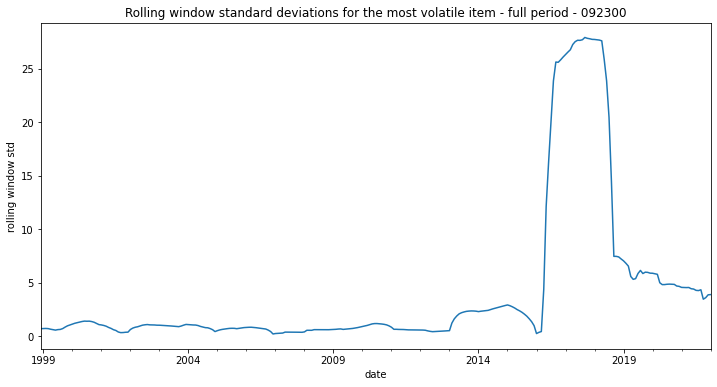

In [15]:
## TODO
df_nona_roll_std[max_item_code].plot(title='Rolling window standard deviations for the most volatile item - full period - 092300', ylabel='rolling window std', figsize=(12,6))


<AxesSubplot:title={'center':'Rolling window standard deviations for the most volatile item - last 24 months - 091200'}, xlabel='date', ylabel='rolling window std'>

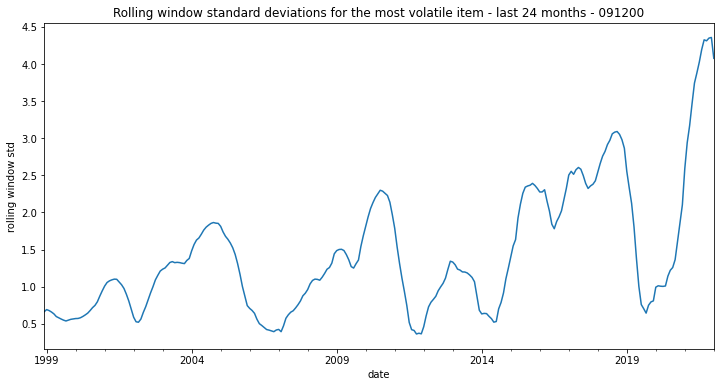

In [16]:
df_nona_roll_std[max_item_code_24].plot(title='Rolling window standard deviations for the most volatile item - last 24 months - 091200', ylabel='rolling window std', figsize=(12,6))